In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [12]:
# Читаем данные и очищаем от лишних кавычек
df = pd.read_csv('../data/М.Тех_Данные_к_ТЗ_DS.csv', encoding='1251', sep=',', quoting=3)
df = df.astype(str).map(lambda x: x.replace('"', ''))
df.columns=['sick_days', 'age', 'gender']
df[['age','sick_days']]= df[['age','sick_days']].astype(int)
df


,sick_days,age,gender
0,5,39,Ж
1,4,54,М
2,4,26,М
3,5,42,М
4,4,29,М
...,...,...,...
232,5,30,М
233,4,36,Ж
234,2,60,Ж
235,2,44,Ж


### Проверка гипотезы 1
Мужчины пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще женщин.

In [13]:
df.shape


(237, 3)

In [14]:
# Нас интересуют пропуски более 2 дней (строгое неравенство)
df=df[df['sick_days']>2]
df.shape

(151, 3)

Размерность выборок 84 - мужчины, 67 - женщины


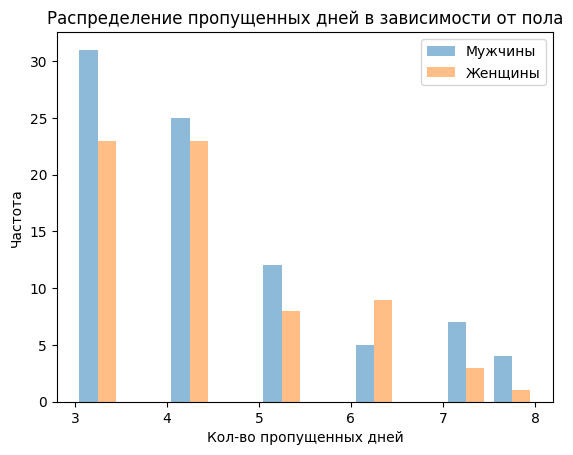

In [15]:
# разделим данные по полу
data_male = df[df['gender'] == 'М']['sick_days'].sort_values()
data_female = df[df['gender'] == 'Ж']['sick_days'].sort_values()
print(f'Размерность выборок {len(data_male )} - мужчины, {len(data_female)} - женщины')
# строим гистограммы распределения количества пропущенных рабочих дней по болезни для мужчин и женщин
plt.hist([data_male , data_female], alpha=0.5, label=['Мужчины', 'Женщины'])
plt.legend(loc='upper right')
plt.title('Распределение пропущенных дней в зависимости от пола')
plt.xlabel('Кол-во пропущенных дней')
plt.ylabel('Частота')
plt.show()


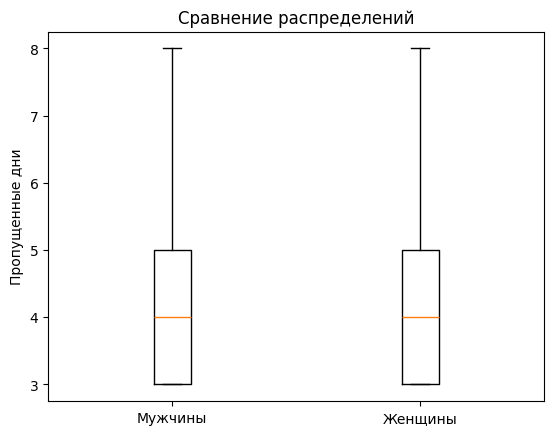

In [16]:
# строим boxplot для сравнения распределений
plt.boxplot([data_male, data_female])
plt.xticks([1, 2], ['Мужчины', 'Женщины'])
plt.title('Сравнение распределений')
plt.ylabel('Пропущенные дни')
plt.show()

In [17]:
#Визуально оценили данные как не нормально распределенные, можем подтвердить тестом Шапиро-Уилка
#Тест оценивает набор данных и дает количественную оценку вероятности того, что данные были получены из Гауссовского (нормального) распределения.

stat_shapiro_male, p_male = stats.shapiro(data_male)
stat_shapiro_female, p_female = stats.shapiro(data_female)
print(f'Мужчины: Статистика Шапиро={stat_shapiro_male:.3f}, p-value={p_male:.3f}')
print(f'Женщины: Статистика Шапиро={stat_shapiro_female:.3f}, p-value={p_female:.3f}')

if p_male > 0.05 and p_female > 0.05:
    print(f'Принять гипотезу о нормальности обоих распределений\n')
else:
    print(f'Отклонить гипотезу о нормальности обоих распределений\n')

Мужчины: Статистика Шапиро=0.816, p-value=0.000
Женщины: Статистика Шапиро=0.841, p-value=0.000
Отклонить гипотезу о нормальности обоих распределений



In [18]:
#Так как pаспределение не нормальное, то использование t-критериев не даст верного результата, нам подходят непараметрические критерии
#Будем использовать критерия Манна-Уитни

alpha=0.05
# Обоснование выбора уровня значимости: на небольших выборках чаще всего используют alpha=0.05 или 0.1. 
# Объем выборки влияет на можность статистического теста, и возможно, введения более строгого допущения вероятности ошибки первого рода, здесь оснований нет

stat_mw, p_value_mw = stats.mannwhitneyu(data_male, data_female, alternative='greater')
print(f'Статистика Манна-Уитни={stat_mw :.3f}, p-value={p_value_mw:.3f}')
if p_value_mw < alpha:
    print('Отклоняем нулевую гипотезу о том, доли мужчин и женщин, пропустивших более 2 дней по болезни значимо не отличаются')
    print('Принять альтернативную одностороннюю гипотезу о том, что мужчины пропускают более 2 дней чаще женщин ')
else:
    print('Принимаем нулевую гипотезу о том, что выборки значимо не отличаются')
    print('Отклоняем гипотезу о том, что мужчины пропускают в течение года более 2 рабочих дней по болезни значимо чаще женщин. ')
    

Статистика Манна-Уитни=2829.000, p-value=0.477
Принимаем нулевую гипотезу о том, что выборки значимо не отличаются
Отклоняем гипотезу о том, что мужчины пропускают в течение года более 2 рабочих дней по болезни значимо чаще женщин. 


## Проверка гипотезы 2:
Работники старше 35 лет (age) пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще своих более молодых коллег.


Размерность выборок: 115 - старше 35, 36 - 35 лет и младше


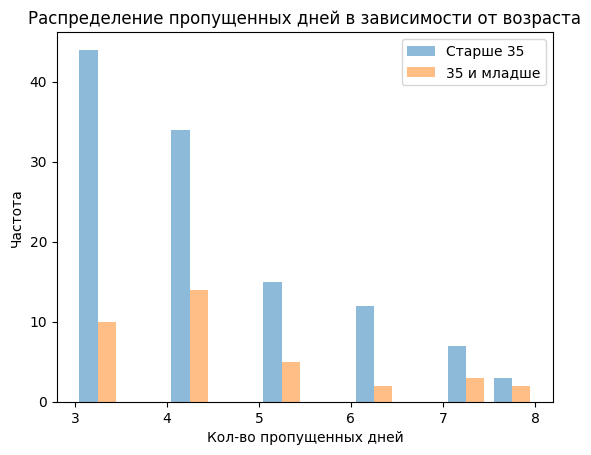

In [19]:

# также нас интересуют пропуски более 2 дней
df=df[df['sick_days']>2]
df.shape

# разделим данные по возрасту
data_aged = df[df['age']>35]['sick_days'].sort_values()
data_young = df[df['age']<=35]['sick_days'].sort_values()
print(f'Размерность выборок: {len(data_aged )} - старше 35, {len(data_young)} - 35 лет и младше')
# строим гистограммы распределения количества пропущенных рабочих дней по болезни для мужчин и женщин
plt.hist([data_aged , data_young], alpha=0.5, label=['Старше 35', '35 и младше'])
plt.legend(loc='upper right')
plt.title('Распределение пропущенных дней в зависимости от возраста')
plt.xlabel('Кол-во пропущенных дней')
plt.ylabel('Частота')
plt.show()


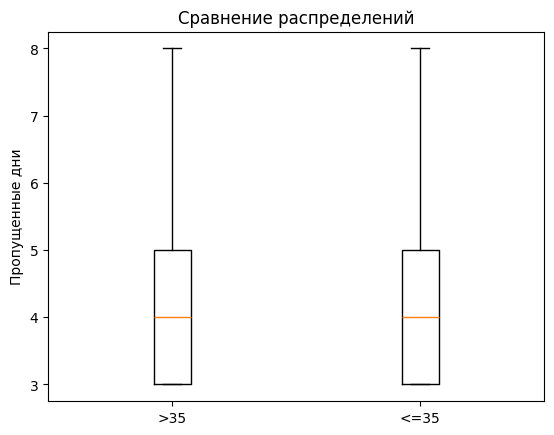

In [20]:
# строим boxplot для сравнения распределений
plt.boxplot([data_aged, data_young])
plt.xticks([1, 2], ['>35', '<=35'])
plt.title('Сравнение распределений')
plt.ylabel('Пропущенные дни')
plt.show()

In [21]:
# Визуально оценили данные как распределенные не нормально, проверим дополнительно тестами:
# нормальность распределений: тест Шапиро Уилка
stat_shapiro_aged, p_aged = stats.shapiro(data_aged)
stat_shapiro_young, p_young = stats.shapiro(data_young)
print(f'Старше 35 лет: Статистика Шапиро={stat_shapiro_aged:.3f}, p-value={p_aged:.3f}')
print(f'Более молодые: Статистика Шапиро={stat_shapiro_young:.3f}, p-value={p_young:.3f}')

if p_aged > 0.05 and p_young > 0.05:
    print(f'Принять гипотезу о нормальности обоих распределений\n')
else:
    print(f'Отклонить гипотезу о нормальности обоих распределений\n')




Старше 35 лет: Статистика Шапиро=0.826, p-value=0.000
Более молодые: Статистика Шапиро=0.826, p-value=0.000
Отклонить гипотезу о нормальности обоих распределений



In [22]:
# мы не смогли доказать нормальность, поэтому снова воспользуемся непараметрическим критерием Манна-Уитни
# если бы выборки были нормальными, мы бы использовали t-критерий и z-score
alpha=0.05
stat_mw, p_value_mw = stats.mannwhitneyu(data_aged, data_young, alternative='greater')
print(f'Статистика Манна-Уитни={stat_mw :.3f}, p-value={p_value_mw:.3f}')
if p_value_mw < alpha:
    print('Отклоняем нулевую гипотезу о том, доли сотрудников сраше 35 лет и их более молодых коллег, пропустивших более 2 дней по болезни значимо не отличаются')
    print('Принимаем альтернативную одностороннюю гипотезу о том, что сотрудники старше 35 лет пропускают более 2 дней больше их более молодых коллег ')
else:
    print('Принять нулевую гипотезу, что выборки значимо не отличаются на уровне значимости', alpha)
    print ('Отклонить гипотезу работники старше 35 лет пропускают в течение года более 2 рабочих дней по болезни значимо чаще своих более молодых коллег.')

    

Статистика Манна-Уитни=1888.000, p-value=0.797
Принять нулевую гипотезу, что выборки значимо не отличаются на уровне значимости 0.05
Отклонить гипотезу работники старше 35 лет пропускают в течение года более 2 рабочих дней по болезни значимо чаще своих более молодых коллег.
